In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [0]:
# img setting for matplotlib
matplotlib.rcParams['figure.figsize'] = (12,12)
matplotlib.rcParams['axes.grid'] = False

In [0]:
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor,dtype=np.uint8)
    if np.ndim(tensor)>3:
        tensor = tensor[0]
    return Image.fromarray(tensor)

In [28]:
content_path = tf.keras.utils.get_file('image.jpg','https://www.petsworld.in/blog/wp-content/uploads/2014/09/cute-kittens.jpg')
style_path = tf.keras.utils.get_file('style.jpg','https://www.wassilykandinsky.net/images/works200/114.jpg')

32768/29168 [=================================] - 0s 0us/step


In [29]:
print(style_path)

/root/.keras/datasets/style.jpg


In [0]:
def load_img(path_of_img):
    max_size = 512
    img = tf.io.read_file(path_of_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_size/ long_dim # scale by resolution
    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [0]:
def imshow(image,title=None):
    if len(image.shape)>3:
        image = tf.squeeze(image,axis = 0)
    plt.imshow(image)
    if title:
        plt.title(title)

In [0]:
content_image = load_img(content_path)
style_image = load_img(style_path)

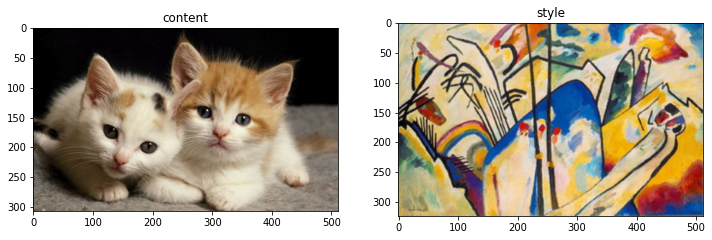

In [33]:
plt.subplot(1,2,1)
imshow(content_image,'content')
plt.subplot(1,2,2)
imshow(style_image,'style')

In [0]:
import tensorflow_hub as hub

In [0]:
hub_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

In [0]:
stylized_img = hub_model(tf.constant(content_image),tf.constant(style_image))

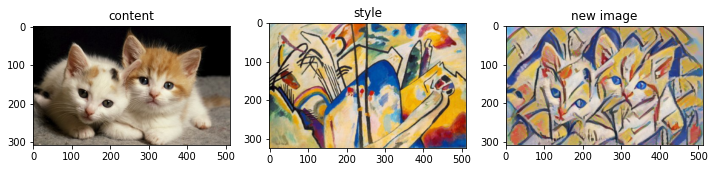

In [49]:
plt.subplot(1,3,1)
imshow(content_image,'content')
plt.subplot(1,3,2)
imshow(style_image,'style')
plt.subplot(1,3,3)
imshow(stylized_img[0],'new image')

In [0]:
conda create -n tf2 python=3.7 --all -y
conda activate tf2
pip install tensorflow-gpu